In [46]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [4]:
#filepath direction
%cd /content/drive/MyDrive/Python BusAn

/content/drive/MyDrive/Python BusAn


In [25]:
#establishing data name
data = pd.read_csv('CreditCard.csv')

In [6]:
print(data.shape)

(1319, 12)


In [8]:
data.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [9]:
#Checking for missing/values that don't make sense
data.isnull().sum()

,0
card,0
reports,0
age,0
income,0
share,0
expenditure,0
owner,0
selfemp,0
dependents,0
months,0


In [26]:
data.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [27]:
#categorical -> numerical variable transformation for:
#card, owner, & selfemp
#shouldn't be necessary to fill in/delete any rows or columns, since the previous command didn't show any null values
data = pd.get_dummies(data, columns=['card', 'owner', 'selfemp'], drop_first=True)

In [28]:
data.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,True,True,False
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,True,False,False


<Axes: xlabel='card_yes', ylabel='reports'>

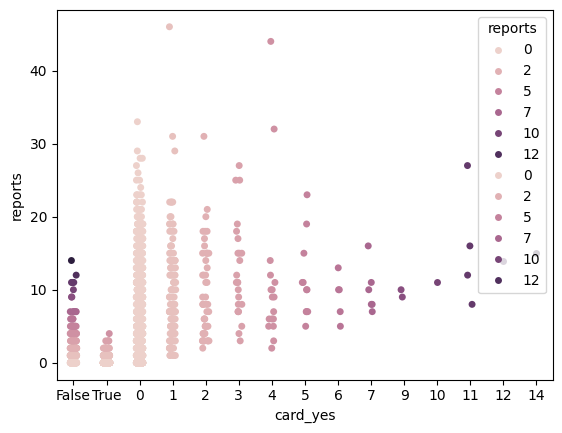

In [34]:
#expenditure and accounts active related to reports, as perhaps the link between these two variables and reports could help determine if
sns.stripplot(data=data, x="card_yes", y="reports", hue="reports")

<Axes: xlabel='reports', ylabel='active'>

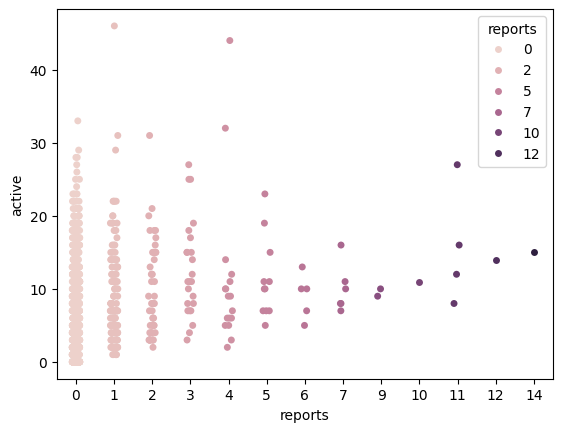

In [50]:
sns.stripplot(data=data, x="reports", y="active", hue="reports")

In [36]:
#isolate variables
x=data.drop('card_yes',axis=1)
y=data['card_yes']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [40]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
y_pred=model.predict(x_test)

In [42]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True,

In [45]:
train_results = x_test.copy()  # Copy x_train to avoid altering original data
train_results['y_test'] = y_test  # Add the y_test original in the data as a new column
train_results['y_pred'] = y_pred
#printing combined data frame
print(train_results.shape)
train_results.head(20)
#right most of the time, so far model looks good, still can't check for overtraining from just this feedback

(264, 13)


,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes,y_test,y_pred
677,0,32.58333,1.8142,0.054141,81.43500,0,9,1,22,True,False,True,True
1046,0,23.91667,2.0000,0.100191,166.90170,0,9,1,0,False,False,True,True
610,0,36.75000,3.0000,0.032497,80.82584,3,134,0,4,True,False,True,True
49,0,27.75000,7.0000,0.110585,644.82830,0,0,1,13,True,False,True,True
1284,0,49.16667,3.1144,0.008495,21.46500,1,154,0,6,True,False,True,True
486,0,22.91667,2.5000,0.239525,498.92670,0,2,1,0,False,False,True,True
548,0,33.66667,2.1000,0.044908,78.25584,4,12,1,0,False,False,True,True
939,2,40.41667,3.3000,0.039779,108.97670,1,58,1,14,False,False,True,True
78,0,0.50000,3.0500,0.101724,258.54920,1,94,1,5,False,False,True,True
506,2,35.58333,5.1000,0.000235,0.00000,1,63,1,8,True,False,False,False


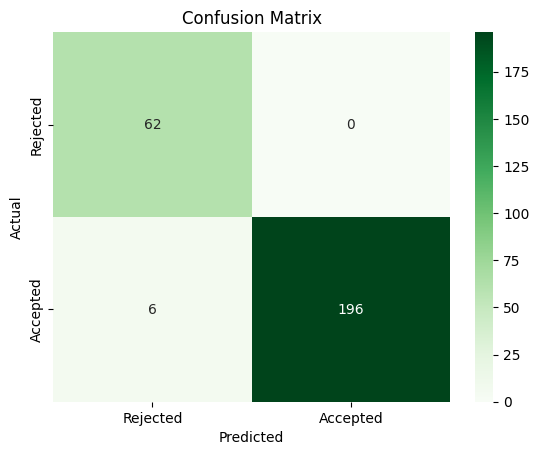

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix using Seaborn's heatmap function, labeling it within this function as well
#helps a little bit with identifying overfitting but not really until the graph
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

#Get a more detailed classification report
print(classification_report(y_test, y_pred))

#Very Very accurate, might be overfitted a little, consider lowering the max_iter from 1000

Accuracy on test set: 0.9772727272727273
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        62
        True       1.00      0.97      0.98       202

    accuracy                           0.98       264
   macro avg       0.96      0.99      0.97       264
weighted avg       0.98      0.98      0.98       264

